In [3]:
filename = "temp/backup/20230521/log_c3_h64_s4_t3.log"
import re

with open(filename, "r", encoding="utf-8") as f:
    lines = f.readlines()
lines = [line.strip() for line in lines[1:] if not line.startswith("Node ")]
units = [lines[i:i + 5] for i in range(0, len(lines), 5)]

In [4]:
class LogItem:
    def __init__(self, qid, pg_plan_time, pg_run_time, mcts_time, plan_gen_time, mhpe_time, hinter_time, actual_plan,
                 actual_time,
                 sum_pg_plan_time, sum_mcts_time, sum_hinter_plan_time, sum_mphe_time, sum_pg, sum_hinter,
                 sum_hinter_div_sum_pg):
        self.qid = qid
        self.pg_plan_time = pg_plan_time
        self.pg_run_time = pg_run_time
        self.mcts_time = mcts_time
        self.plan_gen_time = plan_gen_time
        self.mhpe_time = mhpe_time
        self.hinter_time = hinter_time
        self.actual_plan = actual_plan
        self.actual_time = actual_time
        self.sum_pg_plan_time = sum_pg_plan_time
        self.sum_mcts_time = sum_mcts_time
        self.sum_hinter_plan_time = sum_hinter_plan_time
        self.sum_mphe_time = sum_mphe_time
        self.sum_pg = sum_pg
        self.sum_hinter = sum_hinter
        self.sum_hinter_div_sum_pg = sum_hinter_div_sum_pg

    def __str__(self):
        return f"qid={self.qid}, pg_plan_time={self.pg_plan_time}, pg_run_time={self.pg_run_time}, mcts_time={self.mcts_time}, plan_gen_time={self.plan_gen_time}, mhpe_time={self.mhpe_time}, hinter_time={self.hinter_time}, actual_plan={self.actual_plan}, actual_time={self.actual_time}, sum_pg_plan_time={self.sum_pg_plan_time}, sum_mcts_time={self.sum_mcts_time}, sum_hinter_plan_time={self.sum_hinter_plan_time}, sum_mphe_time={self.sum_mphe_time}, sum_pg={self.sum_pg}, sum_hinter={self.sum_hinter}, sum_hinter_div_sum_pg={self.sum_hinter_div_sum_pg}"

    def __repr__(self):
        return self.__str__()


def log_str_unit_convert_to_log_item(unit, to_tuple=True):
    qid = int(re.findall(r"\d+", unit[0])[0])
    pg_plan_time, pg_run_time = map(float, unit[1].replace("pg plan: ", "").replace("pg run: ", "").split(", "))
    mcts_time, plan_gen_time, mphe_time, hinter_time = map(float, unit[2].replace("mcts: ", "").replace("plan gen: ",
                                                                                                        "").replace(
        "MPHE: ", "").replace("hinter latency: ", "").split(", "))
    actual_plans, actual_time = eval(unit[3].replace("actual_plans=", "").replace("actual_time=", ""))
    sum_pg_plan_time, sum_mcts_time, sum_hinter_plan_time, sum_mphe_time, sum_pg, sum_hinter, sum_hinter_div_sum_pg = map(
        float,
        unit[4].replace("now: sum_pg_plan_time=", "").replace("sum_mcts_time=", "").replace("sum_hinter_plan_time=",
                                                                                            "").replace(
            "sum_mphe_time=", "").replace("sum_pg=", "").replace("sum_hinter=", "").replace("sum_hinter/", "").split(
            " "))
    if to_tuple:
        return qid, pg_plan_time, pg_run_time, mcts_time, plan_gen_time, mphe_time, hinter_time, actual_plans[0], actual_time[0], sum_pg_plan_time, sum_mcts_time, sum_hinter_plan_time, sum_mphe_time, sum_pg, sum_hinter, sum_hinter_div_sum_pg
    return LogItem(qid, pg_plan_time, pg_run_time, mcts_time, plan_gen_time, mphe_time, hinter_time, actual_plans[0],
                   actual_time[0],
                   sum_pg_plan_time, sum_mcts_time, sum_hinter_plan_time, sum_mphe_time, sum_pg, sum_hinter,
                   sum_hinter_div_sum_pg)


log_items = list(map(log_str_unit_convert_to_log_item, units))

In [5]:
log_items


[(0,
  0.004054,
  0.732773,
  0.006634712219238281,
  0.004036,
  0.0044708251953125,
  0.7137089999999999,
  'PG',
  713.709,
  0.0041,
  0.0066,
  0.004,
  0.0045,
  0.7328,
  0.7137,
  0.974),
 (1,
  0.042243,
  2e-05,
  0.01614999771118164,
  0.042237000000000004,
  0.0073604583740234375,
  1.4999999999999999e-05,
  'PG',
  0.015,
  0.0463,
  0.0228,
  0.0463,
  0.0118,
  0.7328,
  0.7137,
  0.974),
 (2,
  0.0011020000000000001,
  0.313122,
  0.0026140213012695312,
  0.0013830000000000001,
  0.003509044647216797,
  0.328139,
  'PG',
  328.139,
  0.0474,
  0.0254,
  0.0477,
  0.0153,
  1.0459,
  1.0419,
  0.9961),
 (3,
  0.017183,
  0.041525,
  0.012309074401855469,
  0.016393,
  0.005656003952026367,
  0.030849,
  'PG',
  30.849,
  0.0646,
  0.0377,
  0.064,
  0.021,
  1.0874,
  1.0727,
  0.9865),
 (4,
  0.00155,
  1.3e-05,
  0.007599353790283203,
  0.001504,
  0.0034973621368408203,
  1.2e-05,
  'PG',
  0.012,
  0.0661,
  0.0453,
  0.0656,
  0.0245,
  1.0875,
  1.0727,
  0.9865),

In [6]:
import pandas as pd

headers = ["qid", "pg_plan_time", "pg_run_time", "mcts_time", "plan_gen_time", "mhpe_time", "hinter_time",
           "actual_plan", "actual_time", "sum_pg_plan_time", "sum_mcts_time", "sum_hinter_plan_time", "sum_mphe_time",
           "sum_pg", "sum_hinter", "sum_hinter_div_sum_pg"]
df = pd.DataFrame(log_items, columns=headers)
df

,qid,pg_plan_time,pg_run_time,mcts_time,plan_gen_time,mhpe_time,hinter_time,actual_plan,actual_time,sum_pg_plan_time,sum_mcts_time,sum_hinter_plan_time,sum_mphe_time,sum_pg,sum_hinter,sum_hinter_div_sum_pg
0,0,0.004054,0.732773,0.006635,0.004036,0.004471,0.713709,PG,713.709,0.0041,0.0066,0.0040,0.0045,0.7328,0.7137,0.9740
1,1,0.042243,0.000020,0.016150,0.042237,0.007360,0.000015,PG,0.015,0.0463,0.0228,0.0463,0.0118,0.7328,0.7137,0.9740
2,2,0.001102,0.313122,0.002614,0.001383,0.003509,0.328139,PG,328.139,0.0474,0.0254,0.0477,0.0153,1.0459,1.0419,0.9961
3,3,0.017183,0.041525,0.012309,0.016393,0.005656,0.030849,PG,30.849,0.0646,0.0377,0.0640,0.0210,1.0874,1.0727,0.9865
4,4,0.001550,0.000013,0.007599,0.001504,0.003497,0.000012,PG,0.012,0.0661,0.0453,0.0656,0.0245,1.0875,1.0727,0.9865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.032977,0.000014,0.010809,0.032659,0.006145,0.000015,PG,0.015,230.1677,218.8703,223.7384,102.0595,25091.1563,14597.0717,0.5818
19996,19996,0.002685,12.688075,0.002884,0.001076,0.003082,4.666801,/*+Leading(ci n)*/,4666.801,230.1704,218.8732,223.7394,102.0626,25103.8444,14601.7385,0.5817
19997,19997,0.023204,0.000025,0.019080,0.022736,0.006275,0.000024,PG,0.024,230.1936,218.8923,223.7622,102.0689,25103.8444,14601.7385,0.5817
19998,19998,0.007981,0.003240,0.014913,0.007158,0.005424,0.000099,PG,0.099,230.2016,218.9072,223.7693,102.0743,25103.8477,14601.7386,0.5817


In [112]:
# # actual_plan有多少个leading开头的
df[df["actual_plan"].str.startswith("/*+Leading")].shape

(2581, 16)

In [133]:
d = []
now_count = 0
for i in range(20000):
    if log_items[i][7].startswith("/*+Leading"):
        now_count += 1
    d.append((i, now_count))
    # d.append((i, df[0:i]["actual_plan"].str.startswith("/*+Leading").sum()))

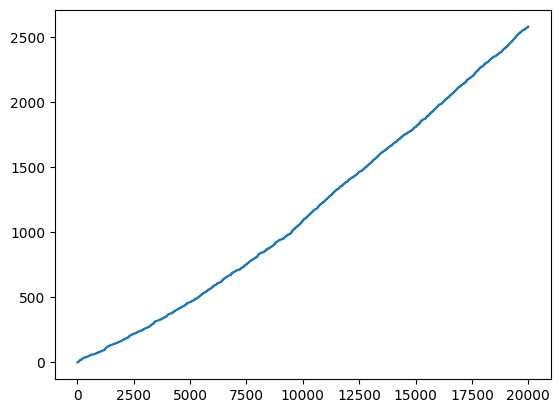

In [135]:
# # 绘制d
import matplotlib.pyplot as plt

plt.plot([i[0] for i in d], [i[1] for i in d])

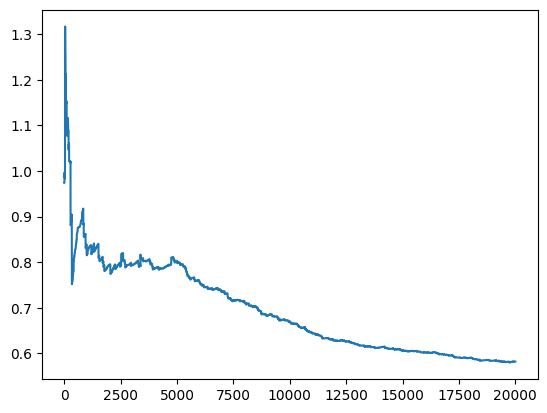

In [136]:
# # log_items 第一列和最后一列的关系
plt.plot(
    [log_items[i][0] for i in range(len(log_items))],
    [log_items[i][-1] for i in range(len(log_items))]
)

## test

In [67]:
d = 'mcts: 0.01036691665649414, plan gen: 0.001603, MPHE: 0.0050334930419921875, hinter latency: 0.108438'

mcts_time, plan_gen_time, mphe_time, hinter_time = map(float, d.replace("mcts: ", "").replace("plan gen: ", "").replace(
    "MPHE: ", "").replace("hinter latency: ", "").split(", "))
print(mcts_time, plan_gen_time, mphe_time, hinter_time)

0.01036691665649414 0.001603 0.0050334930419921875 0.108438


In [70]:
e = "actual_plans=['PG'], actual_time=[0.015]"

actual_plans, actual_time = eval(e.replace("actual_plans=", "").replace("actual_time=", ""))
print(actual_plans, actual_time)

['PG'] [0.015]


In [84]:
f = 'now: sum_pg_plan_time=0.1326 sum_mcts_time=0.0888 sum_hinter_plan_time=0.1309 sum_mphe_time=0.0407 sum_pg=1.0875 sum_hinter=1.0728 sum_hinter/sum_pg=0.9864'

sum_pg_plan_time, sum_mcts_time, sum_hinter_plan_time, sum_mphe_time, sum_pg, sum_hinter, sum_hinter_div_sum_pg = map(
    float,
    f.replace("now: sum_pg_plan_time=", "").replace("sum_mcts_time=", "").replace("sum_hinter_plan_time=", "").replace(
        "sum_mphe_time=", "").replace("sum_pg=", "").replace("sum_hinter=", "").replace("sum_hinter/", "").split(" "))
print(sum_pg_plan_time, sum_mcts_time, sum_hinter_plan_time, sum_mphe_time, sum_pg, sum_hinter, sum_hinter_div_sum_pg)

0.1326 0.0888 0.1309 0.0407 1.0875 1.0728 0.9864


In [83]:
f.replace("now: sum_pg_plan_time=", "").replace("sum_mcts_time=", "").replace("sum_hinter_plan_time=", "").replace(
    "sum_mphe_time=", "").replace("sum_pg=", "").replace("sum_hinter=", "").replace("sum_hinter/", "").split(" ")

['0.1326', '0.0888', '0.1309', '0.0407', '1.0875', '1.0728', '0.9864']

In [2]:
import torch

torch.__version__

'2.0.1+cu117'